# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
import sklearn.linear_model as sk

# Load the Boston dataset

In [2]:
boston = load_boston()
features = np.array(boston.data)
target = np.array(boston.target)

In [3]:
n_training_samples = features.shape[0]
n_dim = features.shape[1]

print('The dataset has',n_training_samples,'training samples.')
print('The dataset has',n_dim,'features.')

The dataset has 506 training samples.
The dataset has 13 features.


In [4]:
def normalize(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.std(dataset, axis = 0)
    return (dataset-mu)/sigma

In [5]:
features_norm = normalize(features)

In [6]:
np.random.seed(42)
rnd = np.random.rand(len(features_norm)) < 0.8

train_x = np.transpose(features_norm[rnd])
train_y = np.transpose(target[rnd])
dev_x = np.transpose(features_norm[~rnd])
dev_y = np.transpose(target[~rnd])

print(train_x.shape)
print(train_y.shape)
print(dev_y.shape)

(13, 399)
(399,)
(107,)


In [7]:
train_y = train_y.reshape(1,len(train_y))
dev_y = dev_y.reshape(1,len(dev_y))

print(train_y.shape)
print(dev_y.shape)

(1, 399)
(1, 107)


# Construction

In [8]:
def create_layer (X, n, activation):
    ndim = int(X.shape[0])
    stddev = 2.0 / np.sqrt(ndim)
    initialization = tf.truncated_normal((n, ndim), stddev = stddev)
    W = tf.Variable(initialization)
    b = tf.Variable(tf.zeros([n,1]))
    Z = tf.matmul(W,X)+b
    return activation(Z), W, b

In [9]:
tf.reset_default_graph()

n_dim = 13
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1

tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2, W2, b2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
y_, W5, b5 = create_layer (hidden4, n_outputs, activation = tf.identity)
#y_ = tf.nn.softmax(outputs)

#cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
cost = tf.reduce_mean(tf.square(y_-Y))

# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

## Plot dev vs train MSE

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_train_history = []
cost_test_history = []
for epoch in range(10000+1):

    sess.run(optimizer, feed_dict = {X: train_x, Y: train_y, learning_rate: 0.001})
    cost_train_ = sess.run(cost, feed_dict={ X:train_x, Y: train_y, learning_rate: 0.001})
    cost_test_ = sess.run(cost, feed_dict={ X:dev_x, Y: dev_y, learning_rate: 0.001})
    cost_train_history = np.append(cost_train_history, cost_train_)
    cost_test_history = np.append(cost_test_history, cost_test_)

    if (epoch % 1000 == 0):
        print("Reached epoch",epoch,"cost J(train) =", cost_train_)
        print("Reached epoch",epoch,"cost J(test) =", cost_test_)

Reached epoch 0 cost J(train) = 471.979
Reached epoch 0 cost J(test) = 444.563
Reached epoch 1000 cost J(train) = 3.68081
Reached epoch 1000 cost J(test) = 18.2743
Reached epoch 2000 cost J(train) = 1.50202
Reached epoch 2000 cost J(test) = 17.9014
Reached epoch 3000 cost J(train) = 0.641386
Reached epoch 3000 cost J(test) = 18.1373
Reached epoch 4000 cost J(train) = 0.224429
Reached epoch 4000 cost J(test) = 18.1608
Reached epoch 5000 cost J(train) = 0.0837186
Reached epoch 5000 cost J(test) = 19.4313
Reached epoch 6000 cost J(train) = 0.0391667
Reached epoch 6000 cost J(test) = 19.5879
Reached epoch 7000 cost J(train) = 0.0228022
Reached epoch 7000 cost J(test) = 19.5508
Reached epoch 8000 cost J(train) = 0.0167917
Reached epoch 8000 cost J(test) = 19.312
Reached epoch 9000 cost J(train) = 0.0100394
Reached epoch 9000 cost J(test) = 19.5473
Reached epoch 10000 cost J(train) = 0.00704259
Reached epoch 10000 cost J(test) = 20.076


## Figure 5-1

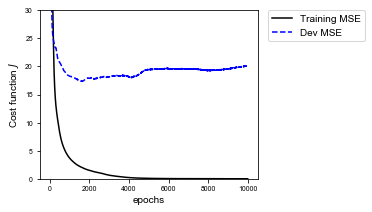

In [12]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_train_history, ls='-', color = 'black', label = r'Training MSE')
ax.plot(cost_test_history, ls='--', color = 'blue', label = r'Dev MSE')
ax.set_xlabel('epochs')
ax.set_ylabel('Cost function $J$')
ax.set_ylim(0,30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('Figure_5-1'+'.png', format='png', dpi=300,bbox_inches='tight')

# Normal function

In [14]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        #for i in range(0, features.shape[1], minibatch_size):
        #    X_train_mini = features[:,i:i + minibatch_size]
        #    y_train_mini = classes[:,i:i + minibatch_size]

        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: target, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    return sess, cost_history

In [20]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 10000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000)

Reached epoch 0 cost J = 401.703
Reached epoch 1000 cost J = 0.646764
Reached epoch 2000 cost J = 0.246118
Reached epoch 3000 cost J = 0.0957675
Reached epoch 4000 cost J = 0.209921
Reached epoch 5000 cost J = 0.0234907
Reached epoch 6000 cost J = 0.0129319
Reached epoch 7000 cost J = 0.00523646
Reached epoch 8000 cost J = 0.0113807
Reached epoch 9000 cost J = 0.00235164
Reached epoch 10000 cost J = 0.00122927


# Plots

## Train & Test

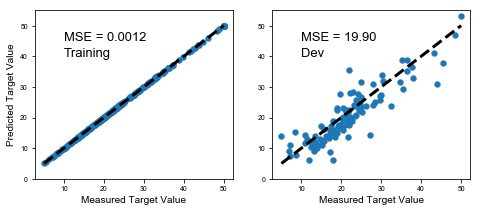

In [21]:
pred_y = sess.run(y_, feed_dict = {X: train_x, Y: train_y})
pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y})
mse_train = sess.run(tf.reduce_mean(tf.square(pred_y - train_y)))
mse_test = sess.run(cost, feed_dict = {X: dev_x, Y: dev_y})

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(train_y, pred_y, lw = 0.3)
ax.plot([dev_y.min(), dev_y.max()], [dev_y.min(), dev_y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')
ax.text(10,45, r'MSE = '+'{:5.4f}'.format(mse_train) , fontsize = 13)
ax.text(10,40, r'Training' , fontsize = 13)
ax.set_ylim(0,55)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(dev_y, pred_y_test, lw = 0.3)
ax.plot([dev_y.min(), dev_y.max()], [dev_y.min(), dev_y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
#ax.set_ylabel('Predicted Target Value')
ax.text(10,45, r'MSE = '+'{:5.2f}'.format(mse_test) , fontsize = 13)
ax.text(10,40, r'Dev' , fontsize = 13)
ax.set_ylim(0,55)


fig.savefig('Figure_5-2'+'.png', format='png', dpi=300,bbox_inches='tight')

## Test

20.076


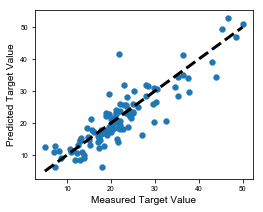

In [45]:
pred_y = sess.run(y_, feed_dict = {X: test_x, Y: test_y})
mse = tf.reduce_mean(tf.square(pred_y - test_y))


print(sess.run(cost, feed_dict = {X: test_x, Y: test_y}))

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(test_y, pred_y, lw = 0.3)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')

fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

# L2 Regularization

## Construction

In [136]:
tf.reset_default_graph()

n_dim = 13
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1


tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())
lambd = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2, W2, b2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
y_, W5, b5 = create_layer (hidden4, n_outputs, activation = tf.identity)
#y_ = tf.nn.softmax(outputs)

#cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

reg = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3) + \
          tf.nn.l2_loss(W4) + tf.nn.l2_loss(W5)

cost_mse = tf.reduce_mean(tf.square(y_-Y))

cost = tf.reduce_mean(cost_mse + lambd*reg)

# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

In [137]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001, lambd_val = 0.1):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        
        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_ = sess.run(cost_mse, feed_dict={ X:features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y})
                print("Reached epoch",epoch,"cost J =", cost_)
                print("Training MSE = ", cost_)
                print("Dev MSE      = ", sess.run(cost_mse, feed_dict = {X: dev_x, Y: dev_y}))
                
    return sess, cost_history

In [138]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 5000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 5000,
                                lambd_val = 10.0)

Reached epoch 0 cost J = 248.026
Training MSE =  248.026
Dev MSE      =  214.921
Reached epoch 5000 cost J = 23.795
Training MSE =  23.795
Dev MSE      =  21.6406


## Number of weights that are zero

In [81]:
def eval_weights_stats(W):
    w_zero_count = np.sum(W < 1e-10)
    return w_zero_count 

In [141]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 0.0)

Reached epoch 0 cost J = 238.378
Training MSE =  238.378
Dev MSE      =  205.561
Reached epoch 1000 cost J = 0.207582
Training MSE =  0.207582
Dev MSE      =  30.3291


In [142]:
weights1 = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.0})
weights2 = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.0})
weights3 = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.0})
weights4 = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.0})
weights5 = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 0.0})

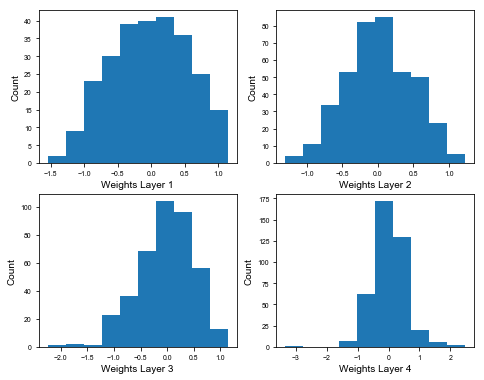

In [36]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')

#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 3')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 4)
plt.hist(weights4.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 4')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

#plt.title ('Weights Distribution')

fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

In [143]:
print((np.sum(np.abs(weights1)< 1e-3))/weights1.size*100.0)
print((np.sum(np.abs(weights2)< 1e-3))/weights2.size*100.0)
print((np.sum(np.abs(weights3)< 1e-3))/weights3.size*100.0)
print((np.sum(np.abs(weights4)< 1e-3))/weights4.size*100.0)
print((np.sum(np.abs(weights5)< 1e-3))/weights5.size*100.0)

0.0
0.25
0.75
0.25
0.0


In [41]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 10.0)

Reached epoch 0 cost J = 248.026
Training MSE =  248.026
Dev MSE      =  214.921
Reached epoch 1000 cost J = 23.7701
Training MSE =  23.7701
Dev MSE      =  21.5193


In [139]:
weights1_ = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights2_ = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights3_ = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights4_ = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights5_ = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})

In [62]:
(eval_weights_stats(weights1_)+\
eval_weights_stats(weights2_)+\
eval_weights_stats(weights3_)+\
eval_weights_stats(weights4_)+\
eval_weights_stats(weights5_))/(weights1_.size + weights2_.size + weights3_.size + weights4_.size + weights5_.size)

0.88716216216216215

In [140]:
print((np.sum(np.abs(weights1_)< 1e-3))/weights1_.size*100.0)
print((np.sum(np.abs(weights2_)< 1e-3))/weights2_.size*100.0)
print((np.sum(np.abs(weights3_)< 1e-3))/weights3_.size*100.0)
print((np.sum(np.abs(weights4_)< 1e-3))/weights4_.size*100.0)
print((np.sum(np.abs(weights5_)< 1e-3))/weights5_.size*100.0)

20.0
41.5
60.5
66.0
35.0


## histogram comparison

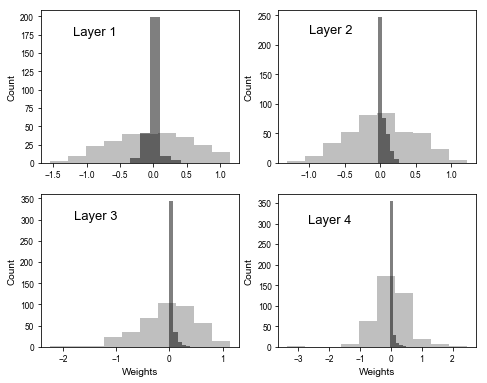

In [45]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights1_.flatten(), alpha = 0.5, bins = 5, color = 'black')
#ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')
ax.text(-1.2, 175, r'Layer 1', fontsize = 13)

#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights2_.flatten(), alpha = 0.5, bins = 5, color = 'black')
#ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
ax.text(-1, 220, r'Layer 2', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights3_.flatten(), alpha = 0.5, bins = 5, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-1.8, 300, r'Layer 3', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 4)
#plt.hist([weights4.flatten(),weights4_.flatten()], bins = 10)
plt.hist(weights4.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights4_.flatten(), alpha = 0.5, bins = 5, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-2.7, 300, r'Layer 4', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

fig.savefig('Figure_5-3'+'.png', format='png', dpi=300,bbox_inches='tight')

### Plot of visual comparison of dev and train

In [ ]:
pred_y = sess.run(y_, feed_dict = {X: train_x, Y: train_y})
pred_y_test = sess.run(y_, feed_dict = {X: test_x, Y: test_y})
mse_train = sess.run(tf.reduce_mean(tf.square(pred_y - train_y)))
mse_test = sess.run(cost_mse, feed_dict = {X: test_x, Y: test_y})

plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(train_y, pred_y, lw = 0.3)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')
ax.text(10,50, r'MSE = '+'{:5.4f}'.format(mse_train) , fontsize = 13)
ax.text(10,45, r'Training' , fontsize = 13)
ax.set_ylim(0,55)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(test_y, pred_y_test, lw = 0.3)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
#ax.set_ylabel('Predicted Target Value')
ax.text(10,50, r'MSE = '+'{:5.2f}'.format(mse_test) , fontsize = 13)
ax.text(10,45, r'Dev' , fontsize = 13)
ax.set_ylim(0,55)


fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

### MSE (Train and dev) vs. lambd

In [126]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 0.1)

sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 0.5)

sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 1.0)

sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 5.0)

sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 10.0)


sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 20.0)

Reached epoch 0 cost J = 238.461
Training MSE =  238.461
Dev MSE      =  205.534
Reached epoch 1000 cost J = 1.08883
Training MSE =  1.08883
Dev MSE      =  14.227
Reached epoch 0 cost J = 238.499
Training MSE =  238.499
Dev MSE      =  205.454
Reached epoch 1000 cost J = 3.22065
Training MSE =  3.22065
Dev MSE      =  14.1694
Reached epoch 0 cost J = 238.648
Training MSE =  238.648
Dev MSE      =  205.747
Reached epoch 1000 cost J = 5.09144
Training MSE =  5.09144
Dev MSE      =  13.6763
Reached epoch 0 cost J = 242.053
Training MSE =  242.053
Dev MSE      =  209.079
Reached epoch 1000 cost J = 16.7152
Training MSE =  16.7152
Dev MSE      =  19.0302
Reached epoch 0 cost J = 248.026
Training MSE =  248.026
Dev MSE      =  214.921
Reached epoch 1000 cost J = 23.7701
Training MSE =  23.7701
Dev MSE      =  21.5193
Reached epoch 0 cost J = 258.858
Training MSE =  258.858
Dev MSE      =  225.645
Reached epoch 1000 cost J = 47.2566
Training MSE =  47.2566
Dev MSE      =  39.6164


In [64]:
lambd_x = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]
mse_train_y = [1.08883, 3.22065, 5.09144, 16.7152, 23.7701, 47.2566]
mse_dev_y = [14.227, 14.1694, 13.6763, 19.0302, 21.5193, 39.6164]

## Plot of MSE_Train and MSE_dev vs. lambd

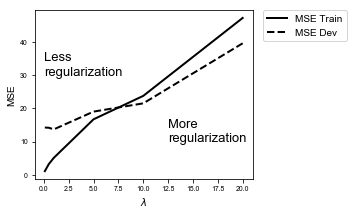

In [193]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(lambd_x, mse_train_y, lw = 2.0, ls = '-', color = 'black', label = 'MSE Train')
ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('MSE')
#ax.set_ylim(0,25)
#ax.set_xlim(0,10)
ax.text(0, 30, 'Less\nregularization', fontsize = 13)
ax.text(12.5, 10, 'More\nregularization', fontsize = 13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


fig.savefig('Figure_5-4'+'.png', format='png', dpi=300,bbox_inches='tight')

# L1 Regularization

In [172]:
tf.reset_default_graph()

n_dim = 13
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1


tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())
lambd = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden2, W2, b2 = create_layer (hidden1, n2, activation = tf.nn.relu)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
y_, W5, b5 = create_layer (hidden4, n_outputs, activation = tf.identity)
#y_ = tf.nn.softmax(outputs)

#cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#reg = tf.nn.l1_loss(W1) + tf.nn.l1_loss(W2) + tf.nn.l1_loss(W3) + \
#          tf.nn.l1_loss(W4) + tf.nn.l1_loss(W5)
    
reg = tf.reduce_sum(tf.abs(W1))+tf.reduce_sum(tf.abs(W2))+tf.reduce_sum(tf.abs(W3))+\
        tf.reduce_sum(tf.abs(W4))+tf.reduce_sum(tf.abs(W5))

cost_mse = tf.reduce_mean(tf.square(y_-Y))

cost = tf.reduce_mean(cost_mse + lambd*reg)

# Adam
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

In [173]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001, lambd_val = 0.1):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        
        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_ = sess.run(cost_mse, feed_dict={ X:features, Y: target, learning_rate: learning_r, lambd: lambd_val})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y})
                print("Reached epoch",epoch,"cost J =", cost_)
                print("Training MSE = ", cost_)
                print("Dev MSE      = ", sess.run(cost_mse, feed_dict = {X: dev_x, Y: dev_y}))
                
    return sess, cost_history

In [130]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 1000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 0.0)

Reached epoch 0 cost J = 238.378
Training MSE =  238.378
Dev MSE      =  205.561
Reached epoch 1000 cost J = 0.207582
Training MSE =  0.207582
Dev MSE      =  30.3291


In [131]:
weights1 = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights2 = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights3 = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights4 = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights5 = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})

In [134]:
print((np.sum(np.abs(weights1)< 1e-3))/weights1.size*100.0)
print((np.sum(np.abs(weights2)< 1e-3))/weights2.size*100.0)
print((np.sum(np.abs(weights3)< 1e-3))/weights3.size*100.0)
print((np.sum(np.abs(weights4)< 1e-3))/weights4.size*100.0)
print((np.sum(np.abs(weights5)< 1e-3))/weights5.size*100.0)

0.0
0.25
0.75
0.25
0.0


In [106]:
print(eval_weights_stats(weights1)/weights1.size*100.0)
print(eval_weights_stats(weights2)/weights2.size*100.0)
print(eval_weights_stats(weights3)/weights3.size*100.0)
print(eval_weights_stats(weights4)/weights4.size*100.0)
print(eval_weights_stats(weights5)/weights5.size*100.0)

52.3076923077
48.75
45.75
48.0
20.0


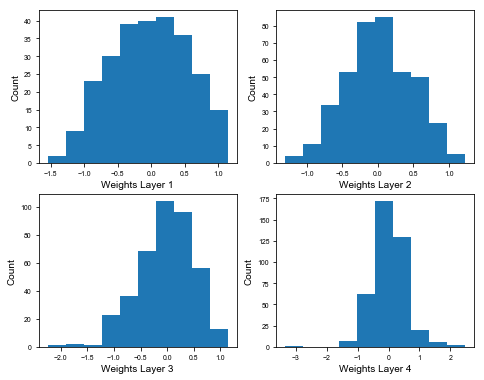

In [107]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')

#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 3')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

ax = fig.add_subplot(2, 2, 4)
plt.hist(weights4.flatten(), bins = 10)
ax.set_xlabel('Weights Layer 4')
ax.set_ylabel('Count')
#ax.set_xlim(0,0.4)

#plt.title ('Weights Distribution')

fig.savefig('Figure_5-X'+'.png', format='png', dpi=300,bbox_inches='tight')

In [183]:
sess, cost_history = model(learning_r = 0.01, 
                                training_epochs = 5000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                lambd_val = 3.0)

Reached epoch 0 cost J = 245.128
Training MSE =  245.128
Dev MSE      =  212.066
Reached epoch 1000 cost J = 19.9295
Training MSE =  19.9295
Dev MSE      =  22.0879
Reached epoch 2000 cost J = 19.8654
Training MSE =  19.8654
Dev MSE      =  22.109
Reached epoch 3000 cost J = 19.9419
Training MSE =  19.9419
Dev MSE      =  21.9349
Reached epoch 4000 cost J = 19.9098
Training MSE =  19.9098
Dev MSE      =  21.9099
Reached epoch 5000 cost J = 19.9313
Training MSE =  19.9313
Dev MSE      =  22.1472


In [184]:
weights1_ = sess.run(W1,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights2_ = sess.run(W2,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights3_ = sess.run(W3,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights4_ = sess.run(W4,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})
weights5_ = sess.run(W5,  feed_dict = {X: train_x, Y: train_y, learning_rate: 0.01, lambd: 10.0})

In [185]:
print((np.sum(np.abs(weights1_)< 1e-3))/weights1_.size*100.0)
print((np.sum(np.abs(weights2_)< 1e-3))/weights2_.size*100.0)
print((np.sum(np.abs(weights3_)< 1e-3))/weights3_.size*100.0)
print((np.sum(np.abs(weights4_)< 1e-3))/weights4_.size*100.0)
print((np.sum(np.abs(weights5_)< 1e-3))/weights5_.size*100.0)

55.3846153846
50.75
50.75
47.25
40.0


# How many weights are "exactly" zero?

In [189]:
np.min(np.abs(weights1_))

8.1549551e-06

In [192]:
print((np.sum(np.abs(weights1_)<1e-5))/weights1_.size*100.0)
print((np.sum(np.abs(weights2_)<1e-5))/weights2_.size*100.0)
print((np.sum(np.abs(weights3_)<1e-5))/weights3_.size*100.0)
print((np.sum(np.abs(weights4_)< 1e-5))/weights4_.size*100.0)
print((np.sum(np.abs(weights5_)< 1e-5))/weights5_.size*100.0)

0.384615384615
0.5
0.5
1.0
5.0


In [127]:
print(np.sum(np.abs(weights1_) < 5e-3))
print(np.sum(np.abs(weights2_) < 5e-3))
print(np.sum(np.abs(weights3_) < 5e-3))
print(np.sum(np.abs(weights4_) < 5e-3))

252
399
398
397


## histogram comparison

# Figure 5-8

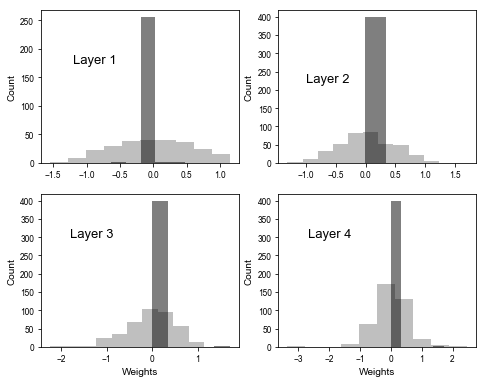

In [116]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights1_.flatten(), alpha = 0.5, bins = 5, color = 'black')
#ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')
ax.text(-1.2, 175, r'Layer 1', fontsize = 13)

#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights2_.flatten(), alpha = 0.5, bins = 5, color = 'black')
#ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
ax.text(-1, 220, r'Layer 2', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights3_.flatten(), alpha = 0.5, bins = 5, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-1.8, 300, r'Layer 3', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 4)
#plt.hist([weights4.flatten(),weights4_.flatten()], bins = 10)
plt.hist(weights4.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights4_.flatten(), alpha = 0.5, bins = 5, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-2.7, 300, r'Layer 4', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

fig.savefig('Figure_5-8'+'.png', format='png', dpi=300,bbox_inches='tight')

Text(-2.7,300,'Layer 4')

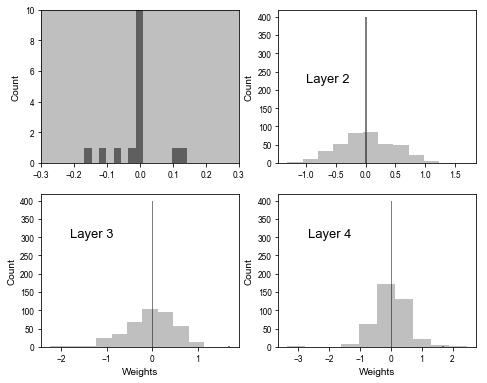

In [121]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 6.2))
ax = fig.add_subplot(2, 2, 1)
plt.hist(weights1.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights1_.flatten(), alpha = 0.5, bins = 50, color = 'black')
#ax.set_xlabel('Weights Layer 1')
ax.set_ylabel('Count')
ax.set_xlim(-0.3,0.3)
ax.set_ylim(0, 10)
#ax.text(-1.2, 175, r'Layer 1', fontsize = 13)

#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 2)
plt.hist(weights2.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights2_.flatten(), alpha = 0.5, bins = 50, color = 'black')
#ax.set_xlabel('Weights Layer 2')
ax.set_ylabel('Count')
ax.text(-1, 220, r'Layer 2', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 3)
plt.hist(weights3.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights3_.flatten(), alpha = 0.5, bins = 50, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-1.8, 300, r'Layer 3', fontsize = 13)
#ax.set_xlim(-0.4,0.4)

ax = fig.add_subplot(2, 2, 4)
#plt.hist([weights4.flatten(),weights4_.flatten()], bins = 10)
plt.hist(weights4.flatten(), alpha = 0.25, bins = 10, color = 'black')
plt.hist(weights4_.flatten(), alpha = 0.5, bins = 50, color = 'black')
ax.set_xlabel('Weights')
ax.set_ylabel('Count')
ax.text(-2.7, 300, r'Layer 4', fontsize = 13)
#ax.set_xlim(-0.4,0.4)


# Dropout Regularization

In [9]:
tf.reset_default_graph()

n_dim = 13
n1 = 20
n2 = 20
n3 = 20
n4 = 20
n_outputs = 1


tf.set_random_seed(5)

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])

learning_rate = tf.placeholder(tf.float32, shape=())
keep_prob = tf.placeholder(tf.float32, shape=())

hidden1, W1, b1 = create_layer (X, n1, activation = tf.nn.relu)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)
hidden2, W2, b2 = create_layer (hidden1_drop, n2, activation = tf.nn.relu)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)
hidden3, W3, b3 = create_layer (hidden2, n3, activation = tf.nn.relu)
hidden3_drop = tf.nn.dropout(hidden3, keep_prob)
hidden4, W4, b4 = create_layer (hidden3, n4, activation = tf.nn.relu)
hidden4_drop = tf.nn.dropout(hidden4, keep_prob)
y_, W5, b5 = create_layer (hidden4_drop, n_outputs, activation = tf.identity)
  
cost = tf.reduce_mean(tf.square(y_-Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

In [16]:
def model(training_epochs, features, target, logging_step = 100, learning_r = 0.001,  keep_prob_val = 0.5):
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    msetrain = []
    msedev = []
    for epoch in range(training_epochs+1):
        
        sess.run(optimizer, feed_dict = {X: features, Y: target, learning_rate: learning_r, keep_prob: keep_prob_val})
        cost_ = sess.run(cost, feed_dict={ X:features, Y: target, learning_rate: learning_r, keep_prob: keep_prob_val})
        cost_history = np.append(cost_history, cost_)
        msetrain = np.append(msetrain, cost_)
        msedev = np.append(msedev, sess.run(cost, feed_dict = {X: dev_x, Y: dev_y, keep_prob: 1.0}))

        if (epoch % logging_step == 0):
                pred_y_test = sess.run(y_, feed_dict = {X: dev_x, Y: dev_y, keep_prob: keep_prob_val})
                print("Reached epoch",epoch,"cost J =", cost_)
                print("Training MSE = ", cost_)
                print("Dev MSE      = ", sess.run(cost, feed_dict = {X: dev_x, Y: dev_y, keep_prob: 1.0}))
                
    return sess, cost_history, msetrain, msedev

In [12]:
sess, cost_history, mset, msed = model(learning_r = 0.01, 
                                training_epochs = 5000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                keep_prob_val = 1.0)

Reached epoch 0 cost J = 522.358
Training MSE =  522.358
Dev MSE      =  496.344
Reached epoch 1000 cost J = 1.07018
Training MSE =  1.07018
Dev MSE      =  14.0924
Reached epoch 2000 cost J = 0.356435
Training MSE =  0.356435
Dev MSE      =  14.493
Reached epoch 3000 cost J = 0.130705
Training MSE =  0.130705
Dev MSE      =  15.5712
Reached epoch 4000 cost J = 0.0556582
Training MSE =  0.0556582
Dev MSE      =  18.7195
Reached epoch 5000 cost J = 0.0340588
Training MSE =  0.0340588
Dev MSE      =  20.8336


ValueError: too many values to unpack (expected 2)

In [ ]:
sess, cost_history05 = model(learning_r = 0.01, 
                                training_epochs = 5000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                keep_prob_val = 0.5)

In [17]:
sess, cost_history04, mset04, msed04 = model(learning_r = 0.01, 
                                training_epochs = 8000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                keep_prob_val = 0.4)

Reached epoch 0 cost J = 559.823
Training MSE =  559.823
Dev MSE      =  501.082
Reached epoch 1000 cost J = 51.1187
Training MSE =  51.1187
Dev MSE      =  76.1653
Reached epoch 2000 cost J = 26.4444
Training MSE =  26.4444
Dev MSE      =  67.5
Reached epoch 3000 cost J = 19.4077
Training MSE =  19.4077
Dev MSE      =  57.8129
Reached epoch 4000 cost J = 19.8314
Training MSE =  19.8314
Dev MSE      =  55.39
Reached epoch 5000 cost J = 22.2571
Training MSE =  22.2571
Dev MSE      =  52.4668
Reached epoch 6000 cost J = 18.3457
Training MSE =  18.3457
Dev MSE      =  54.4797
Reached epoch 7000 cost J = 23.0359
Training MSE =  23.0359
Dev MSE      =  47.3276
Reached epoch 8000 cost J = 16.7558
Training MSE =  16.7558
Dev MSE      =  51.9848


In [ ]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(3.9, 3.1))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, lw = 2.0, ls = '-', color = 'black', label = 'Without regularisation')
ax.plot(cost_history04, lw = 2.0, ls = '--', color = 'black', label = 'With regularisation')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'Cost functioni $J$')
ax.set_ylim(0,200)
ax.set_xlim(0,2000)
#ax.text(0, 30, 'Less\nregularization', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

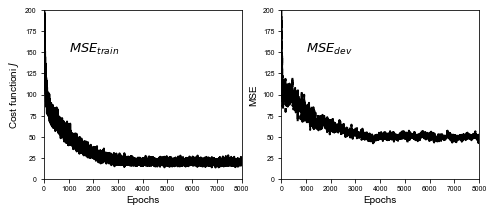

In [18]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mset04, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
#ax.plot(msed, lw = 2.0, ls = '--', color = 'black', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'Cost functioni $J$')
ax.set_ylim(0,200)
ax.set_xlim(0,8000)
ax.text(1000, 150, r'$MSE_{train}$', fontsize = 13)


#ax.text(0, 30, 'Less\nregularization', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)



ax = fig.add_subplot(1, 2, 2)
#ax.plot(mset, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
ax.plot(msed04, lw = 2.0, ls = '--', color = 'black', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'MSE')
ax.set_ylim(0,200)
ax.set_xlim(0,8000)
ax.text(1000, 150, r'$MSE_{dev}$', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)



In [19]:
sess, cost_history, mset, msed = model(learning_r = 0.01, 
                                training_epochs = 8000, 
                                features = train_x, 
                                target = train_y,
                                logging_step = 1000,
                                keep_prob_val = 1.0)

Reached epoch 0 cost J = 522.358
Training MSE =  522.358
Dev MSE      =  496.344
Reached epoch 1000 cost J = 1.07018
Training MSE =  1.07018
Dev MSE      =  14.0924
Reached epoch 2000 cost J = 0.356435
Training MSE =  0.356435
Dev MSE      =  14.493
Reached epoch 3000 cost J = 0.130705
Training MSE =  0.130705
Dev MSE      =  15.5712
Reached epoch 4000 cost J = 0.0556582
Training MSE =  0.0556582
Dev MSE      =  18.7195
Reached epoch 5000 cost J = 0.0340588
Training MSE =  0.0340588
Dev MSE      =  20.8336
Reached epoch 6000 cost J = 0.0185474
Training MSE =  0.0185474
Dev MSE      =  22.4387
Reached epoch 7000 cost J = 0.00692613
Training MSE =  0.00692613
Dev MSE      =  23.3184
Reached epoch 8000 cost J = 0.00186478
Training MSE =  0.00186478
Dev MSE      =  23.4883


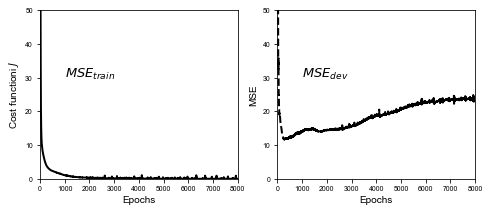

In [20]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mset, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
#ax.plot(msed, lw = 2.0, ls = '--', color = 'black', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'Cost functioni $J$')
ax.set_ylim(0,50)
ax.set_xlim(0,8000)
ax.text(1000, 30, r'$MSE_{train}$', fontsize = 13)


#ax.text(0, 30, 'Less\nregularization', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)



ax = fig.add_subplot(1, 2, 2)
#ax.plot(mset, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
ax.plot(msed, lw = 2.0, ls = '--', color = 'black', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'MSE')
ax.set_ylim(0,50)
ax.set_xlim(0,8000)
ax.text(1000, 30, r'$MSE_{dev}$', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)





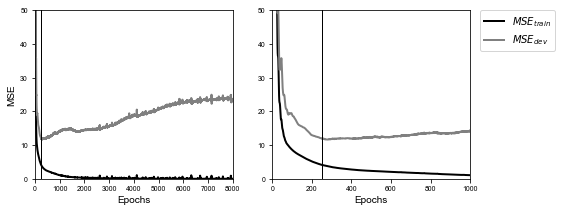

In [66]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(7.8, 3.1))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mset, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
ax.plot(msed, lw = 2.0, ls = '-', color = 'gray', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
ax.set_ylabel(r'MSE')
ax.set_ylim(0,50)
ax.set_xlim(0,8000)
#ax.text(1000, 30, r'$MSE_{train}$', fontsize = 13)


#ax.text(0, 30, 'Less\nregularization', fontsize = 13)
#ax.text(12.5, 10, 'More\nregularization', fontsize = 13)


plt.axvline(x=250, linewidth=1, color='k')

ax = fig.add_subplot(1, 2, 2)
ax.plot(mset, lw = 2.0, ls = '-', color = 'black', label = r'$MSE_{train}$')
ax.plot(msed, lw = 2.0, ls = '-', color = 'gray', label = r'$MSE_{dev}$')
#ax.plot(lambd_x, mse_dev_y, lw = 2.0, ls = '--', color = 'black', label = 'MSE Dev')
ax.set_xlabel(r'Epochs')
#ax.set_ylabel(r'Cost functioni $J$')
ax.set_ylim(0,50)
ax.set_xlim(0,1000)

plt.axvline(x=250, linewidth=1, color='k')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)